# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install --upgrade pip
! pip install gdown
! gdown 1kqEaDc_yTqH8Yp7FoUacEMtdY-wfGYE6

Downloading...
From: https://drive.google.com/uc?id=1kqEaDc_yTqH8Yp7FoUacEMtdY-wfGYE6
To: C:\Users\dima1\OneDrive - НИУ Высшая школа экономики\Anaconda_Projects\Iad\train_tweets.csv

  0%|          | 0.00/988k [00:00<?, ?B/s]
100%|██████████| 988k/988k [00:00<00:00, 19.3MB/s]


In [3]:
data = pd.read_csv('train_tweets.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# перенес train test split в задание 4 для удобства

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
data.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [7]:
data = data.fillna('')

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [8]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Кол-во твитов с классом 1 (реальное проишествие) примерно на 25% меньше, чем кол-во твитов с классом 0

In [9]:
data.keyword.value_counts()[:11]

               61
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
evacuate       40
fear           40
outbreak       40
Name: keyword, dtype: int64

Не считаем первый класс, так как это просто пустая строка, то есть NA значения, которые были недавно заполнены

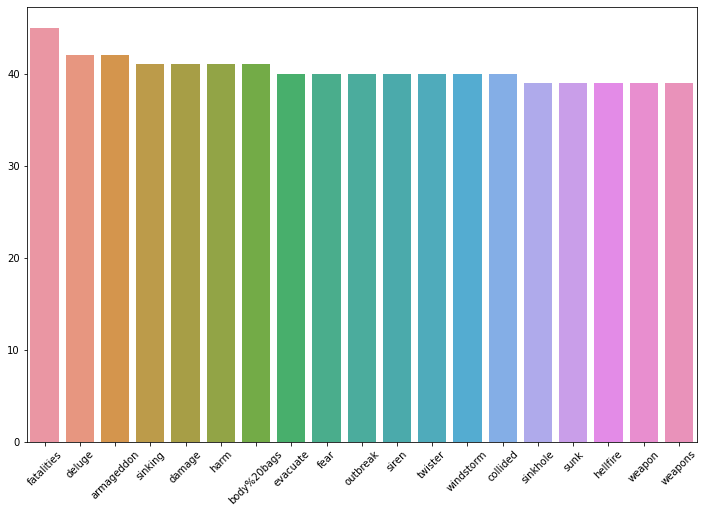

In [10]:
plt.figure(figsize=(12, 8))
temp = data.keyword.value_counts()[1:20]
sns.barplot(x=temp.index, y=temp.values)
plt.xticks(rotation=45)
plt.show()

Если смотреть на картину в целом, то мы можем наблюдать следующий график (см. ниже). На котором заметно, что в целом значения ключевых слов представлены равномерно, однако существует группа таких, которые встречаются довольно редко. Наиболее частое значение NaN, примерно 60 вхождений

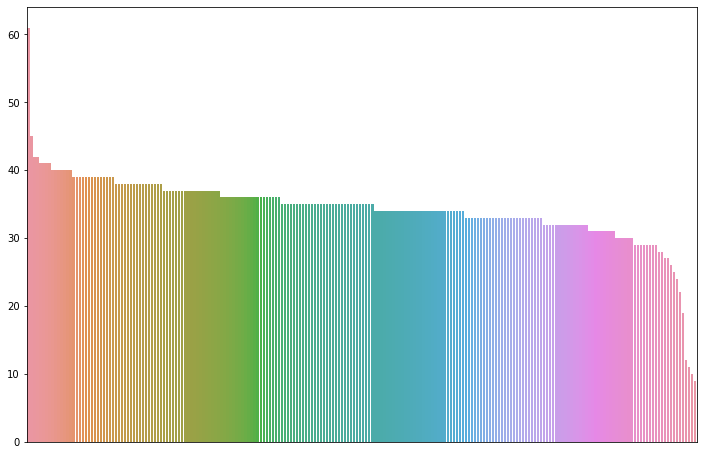

In [11]:
plt.figure(figsize=(12, 8))
temp = data.keyword.value_counts()
sns.barplot(x=np.arange(temp.shape[0]), y=temp.values)
plt.xticks([])
plt.show()

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [12]:
data.drop('id', axis=1, inplace=True)

In [13]:
data['text'] = data['keyword'] + ' ' + data['location'] + ' ' + data['text']
data.drop(['keyword', 'location'], axis=1, inplace=True)

In [14]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' ar...,1
3,"13,000 people receive #wildfires evacuation ...",1
4,Just got sent this photo from Ruby #Alaska a...,1


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.text, data.target, test_size=0.3, random_state=42)

In [16]:
cVect = CountVectorizer()
cVect.fit(X_train)
X_train_cVectorized = cVect.transform(X_train).toarray()

In [17]:
X_train_cVectorized.shape

(5329, 18455)

Получилась матрица размера 5329 строк на 18455 столбцов

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [18]:
import string
import re

# слова, которые содержат # или @ будут посчитаны дважды
# первый раз, как слова содержащие любые символы пунктуации
# второй раз, как слова содержащие хэштеги и упоминания
def explore(vocabulary):
    
    p = re.compile('[' + string.punctuation + '\\\\' + ']')
    
    num_count = 0
    pun_count = 0
    tag_count = 0
    
    for key in vocabulary:
        
        if bool(re.search(r'\d', key)):
            num_count += 1
            
        if bool(re.search(p, key)):
            pun_count += 1
            
        if key[0] == '@' or key[0] == '#':
            tag_count += 1
    
    return (num_count, pun_count, tag_count)

In [19]:
explore(cVect.vocabulary_)

(3812, 315, 0)

В словаре находится:
    
    1) 3812 слов, содержащих цифры
    2) 315 слов, содержащих знаки пунктуации
    3) 0 слов, содержащих хэштеги или упоминания

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [20]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
tk = TweetTokenizer()
cVectTokenized = CountVectorizer(tokenizer=tk.tokenize)
cVectTokenized.fit(X_train)
X_train_cVectorized = cVectTokenized.transform(X_train).toarray()

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [21]:
X_train_cVectorized.shape

(5329, 19670)

Количество стобцов даже выросло, по сравнению со стандартным CountVectorizer

In [22]:
explore(cVectTokenized.vocabulary_)

(3939, 7338, 3149)

В словаре находится:

    1) 3939 слов, содержащих цифры
    2) 7338 слов, содержащих знаки пунктуации
    3) 3149 слов, содержащих хэштеги или упоминания
    
Даже учитывая то, что среди 7338 слов, содержащих знаки пунктуации, 3149 слов - это хэштеги/упоминания, в целом, кол-во слов, содержащих знаки пунктуации значительно выросло, как и слов хэштегов/упоминаний

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [23]:
from nltk.corpus import stopwords
import snowballstemmer

def tokenize(text):
    
    result = list()
    
    # приводим все буквы к нижнему регистру
    text = text.lower()
    
    # разбиваем текст на токены с помощью TweetTokenizer
    tk = TweetTokenizer()
    tokenized_text = tk.tokenize(text)
    
    # добавляем в результирующий массив только токены,
    # соответсвующие определенным паттернам а также сразу проверяем,
    # что токен не в стопсловах
    latin_pattern = re.compile('^[a-z]+$')
    smile_pattern = re.compile('(^[^a-zA-Z0-9\n]*[()]+[^a-zA-Z0-9\n]+$)|(^[^a-zA-Z0-9\n]+[()]+[^a-zA-Z0-9\n]*$)')
    hashtag_pattern = re.compile('^#[a-z]+$')
    
    stop = stopwords.words('english')
    
    for token in tokenized_text:
    
        if bool(re.match(latin_pattern, token)) and token not in stop:
            result.append(token)

        elif bool(re.match(smile_pattern, token)) and token not in stop:
            result.append(token)

        elif bool(re.match(hashtag_pattern, token)) and token not in stop:
            result.append(token)
    
    # проведем стемминг
    stemmer = snowballstemmer.stemmer('english')
    result = stemmer.stemWords(result)
    
    return result

In [24]:
n_example = 10

for i in range(n_example):
    st = X_train.iloc[i]
    print('\n-----------\n')
    
    print(f'{i+1}: {st}\n\n -----> \n\n{i+1}: {tokenize(st)}')


-----------

1: bridge%20collapse  Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

 -----> 

1: ['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']

-----------

2: hail Carol Stream, Illinois GREAT MICHIGAN TECHNIQUE CAMP
B1G THANKS TO @bmurph1019 
@hail_Youtsey . @termn8r13 
#GoBlue #WrestleOn http://t.co/OasKgki6Qj

 -----> 

2: ['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']

-----------

3: police Houston  CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR

 -----> 

3: ['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']

-----------

4: rioting  Still rioting in a couple of hours left until I have to be up for class.

 -----> 

4: ['riot', 'still', 'riot', 'coupl', 'hour', 'left'

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Применим CountVectorizer c созданным токенизатором
cVectCustom = CountVectorizer(tokenizer=tokenize)
cVectCustom.fit(X_train)
X_train_cVectorized = cVectCustom.transform(X_train)
X_test_cVectorized = cVectCustom.transform(X_test)

In [26]:
# создадим модель
model_lr = LogisticRegression(penalty='l2', C=0.49)
model_lr.fit(X_train_cVectorized, y_train)

# сделаем предсказания
train_prediction = model_lr.predict(X_train_cVectorized)
test_prediction = model_lr.predict(X_test_cVectorized)

# вывод
print(f'F1 score на тренировочных данных: {f1_score(y_train, train_prediction)}')
print(f'F1 score на тестовых данных: {f1_score(y_test, test_prediction)}')

F1 score на тренировочных данных: 0.9196850393700787
F1 score на тестовых данных: 0.7604110329908058


Удалось получить требуемые 75% f1 меры уже на данном этапе. Однако заметим, что на тренировочных данных модель показывает сильно лучшие результаты, возможно это связано с переобучением

Если немного поменять силу регуляризации, то можно получить 76% f1 меры, как показано выше

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

Я подумал, что в пункте 1 требуется, скорее всего, повторить задание 8, а не 7, так как задание 7 про написание своего токенизатора

#### Пункт 1

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# применим tfidf
tfidf = TfidfVectorizer(tokenizer=tokenize)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# размер матриццы без ораничения по df
print(X_train_tfidf.shape)

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(5329, 10478)


In [28]:
# создадим модель
model_lr = LogisticRegression(penalty='l2')
model_lr.fit(X_train_tfidf, y_train)

# сделаем предсказания
train_prediction = model_lr.predict(X_train_tfidf)
test_prediction = model_lr.predict(X_test_tfidf)

# вывод
print(f'F1 score на тренировочных данных: {f1_score(y_train, train_prediction)}')
print(f'F1 score на тестовых данных: {f1_score(y_test, test_prediction)}')

F1 score на тренировочных данных: 0.8430913348946135
F1 score на тестовых данных: 0.7433333333333335


Пусть качество упало, но разрыв между тестом и трейном тоже упал, что может означать, что фичи стали нести больше смысла, так как модель меньше переобучается. Также, если немного уменьшить силу регуляризации, можно получить такие же результаты по качеству, что и в Задании 7, однако с меньшим переобучением модели на трейне, что несомненно полезно

#### Пункт 2

In [29]:
# применим tfidf с верхней границей 0.9
tfidf = TfidfVectorizer(tokenizer=tokenize, max_df=0.9)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# размер матриццы с ограничением по df
print(X_train_tfidf.shape)

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(5329, 10478)


In [30]:
# создадим модель
model_lr = LogisticRegression(penalty='l2')
model_lr.fit(X_train_tfidf, y_train)

# сделаем предсказания
train_prediction = model_lr.predict(X_train_tfidf)
test_prediction = model_lr.predict(X_test_tfidf)

# вывод
print(f'F1 score на тренировочных данных: {f1_score(y_train, train_prediction)}')
print(f'F1 score на тестовых данных: {f1_score(y_test, test_prediction)}')

F1 score на тренировочных данных: 0.8430913348946135
F1 score на тестовых данных: 0.7433333333333335


Размер матрицы не изменился, как и качество. Скорее всего это произошло по причине того, что мы отбросили популярные слова не несущие особого смысла уже на этапе токенизации с помощью нашего кастомного токенизатора. 

Соответственно, чтобы хоть как-то изменить размер массива, нужно поставить max_df = 0.01, причем качество сильно падает даже от небольшого уменьшения массива (-400 признаков при значении max_df = 0.005), так как возможно с такой частотой мы встречаем довольно важные для модели слова. 

#### Пункт 3

In [31]:
# применим tfidf с нижней границей 0.001
tfidf = TfidfVectorizer(tokenizer=tokenize, max_df=0.9, min_df=0.001)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# размер матриццы с ограничением по df
print(X_train_tfidf.shape)

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(5329, 1739)


In [32]:
# создадим модель
model_lr = LogisticRegression(penalty='l2')
model_lr.fit(X_train_tfidf, y_train)

# сделаем предсказания
train_prediction = model_lr.predict(X_train_tfidf)
test_prediction = model_lr.predict(X_test_tfidf)

# вывод
print(f'F1 score на тренировочных данных: {f1_score(y_train, train_prediction)}')
print(f'F1 score на тестовых данных: {f1_score(y_test, test_prediction)}')

F1 score на тренировочных данных: 0.8022258288894041
F1 score на тестовых данных: 0.7464324917672888


Если поставить min_df = 0.001, исходя из предположения, что совсем редкие слова тоже не помогут нашей модели, то удасться отсеять огромное количество признаков, при этом не потеряв в качества, даже улучшив его на незначительные 0.003. Однако это также поможет уменьшить переобучение модели на тренировочных данных

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [33]:
from sklearn.feature_extraction.text import HashingVectorizer

# применим HashingVectorizer
vHashing = HashingVectorizer(tokenizer=tokenize, n_features=5000)
vHashing.fit(X_train)
X_train_hash = vHashing.transform(X_train)
X_test_hash = vHashing.transform(X_test)

# размер матриццы
print(X_train_hash.shape)

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(5329, 5000)


In [34]:
# создадим модель
model_lr = LogisticRegression(penalty='l2')
model_lr.fit(X_train_hash, y_train)

# сделаем предсказания
train_prediction = model_lr.predict(X_train_hash)
test_prediction = model_lr.predict(X_test_hash)

# вывод
print(f'F1 score на тренировочных данных: {f1_score(y_train, train_prediction)}')
print(f'F1 score на тестовых данных: {f1_score(y_test, test_prediction)}')

F1 score на тренировочных данных: 0.7992547741034001
F1 score на тестовых данных: 0.7205800334634691


Видим, что модель не сильно переобучается, однако итоговое качество на тесте уже не такое хорошее, возможно тщательный подбор гиперпараметра n_features помог бы модели получить более хороший результат

Из всех моделей я бы обратил внимание на две:
    
    1) Обученную на обычном CountVectorizer со слабой регуляризацией, которая помогла достигнуть 76% f1 меры на тесте
    
    2) Обученную на Tfidf, с выставленным параметром минимальной частоты, которая при настройки силы регуляризации тоже позволяет получить 75% качества на тесте, однако модель сильно меньше переобучается на трейне, что поможет ей получать более стабильные результаты на случайных данных, в отличие от первой. Также при использовании данного метода признаковое поле было сокращено до 1739 признаков, что может сильно помочь в использовании других моделей помимо линейных, так как сильно сокращает размерность данных

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

В задании 8 было достигнуто значение 0.76 для f1 меры

In [35]:
# применим tfidf с нижней границей 0.001
tfidf = TfidfVectorizer(tokenizer=tokenize, max_df=0.9, min_df=0.001)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# размер матриццы с ограничением по df
print(X_train_tfidf.shape)

# создадим модель
model_lr = LogisticRegression(penalty='l2', C=4)
model_lr.fit(X_train_tfidf, y_train)

# сделаем предсказания
train_prediction = model_lr.predict(X_train_tfidf)
test_prediction = model_lr.predict(X_test_tfidf)

# вывод
print(f'F1 score на тренировочных данных: {f1_score(y_train, train_prediction)}')
print(f'F1 score на тестовых данных: {f1_score(y_test, test_prediction)}')

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(5329, 1739)
F1 score на тренировочных данных: 0.8420332801458856
F1 score на тестовых данных: 0.7569593147751607
